# Farady Rotation Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from scipy import optimize


## Open Data File

In [2]:
f = open('DC.txt')
dc = np.array([ np.array(line.split()).astype(np.float) for line in f] )
dc

array([[  0. ,   6.3,   6.7],
       [ 15. ,   5.1,   5.5],
       [ 30. ,   3.6,   4.1],
       [ 45. ,   2.2,   2.6],
       [ 60. ,   1.4,   1.6],
       [ 75. ,   1.3,   1.4],
       [ 90. ,   2. ,   1.9],
       [105. ,   3.2,   3.1],
       [120. ,   4.8,   4.5],
       [135. ,   6.1,   5.9],
       [150. ,   6.9,   6.9],
       [165. ,   7. ,   7.1],
       [180. ,   6.5,   6.6],
       [195. ,   5.1,   5.5],
       [210. ,   3.6,   4. ],
       [225. ,   2.2,   2.6],
       [240. ,   1.4,   1.7],
       [255. ,   1.3,   1.4],
       [270. ,   2. ,   1.8],
       [285. ,   3.2,   3. ],
       [300. ,   4.7,   4.4],
       [315. ,   6. ,   5.9],
       [330. ,   6.9,   6.9],
       [345. ,   7. ,   7.2],
       [360. ,   6.3,   6.8]])

## Define Function to be optimized

In [3]:
def test_func(x, a, b, c):
    return a * (np.cos((2*np.pi/360)*x + b)**2) +c

## Optimize the functions, and plot

Text(0.5, 1.0, '0A vs 3A')

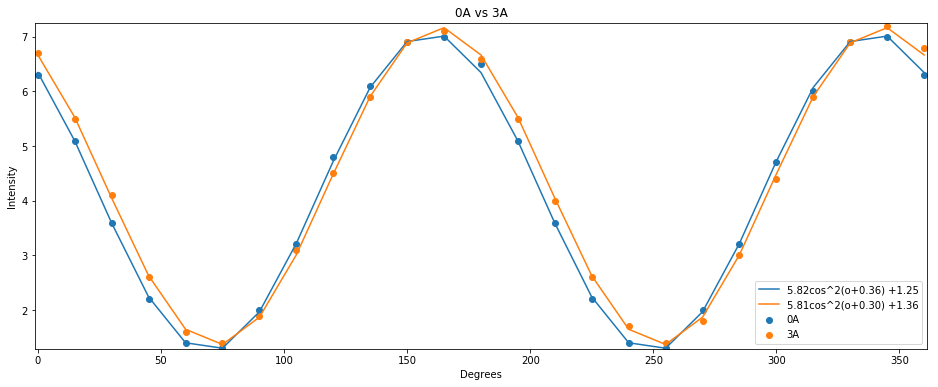

In [17]:
%matplotlib inline
fig = plt.figure(0, figsize=(16, 6))
x = dc[:, 0]
y = dc[:, 1]
z = dc[:, 2]
params1, params_covariance = optimize.curve_fit(test_func, x, y, bounds=([0, 0, 0], [6, np.pi, 2]) )
params2, params_covariance = optimize.curve_fit(test_func, x, z, bounds=([0, 0, 0], [6, np.pi, 2]) )

gs = gridspec.GridSpec(5, 4)
ax1 = plt.subplot(gs[0:, 0:])
p1 = test_func(x, *params1)
p2 = test_func(x, *params2)
ax1.scatter(x, y, label='0A')
ax1.plot(x, p1, label =  "{:.2f}".format(params1[0])+'cos^2(o+' + "{:.2f}".format(params1[1])+') +' + "{:.2f}".format(params1[2]))
ax1.scatter(x,z, label= '3A')
ax1.plot(x, p2, label = "{:.2f}".format(params2[0])+'cos^2(o+' + "{:.2f}".format(params2[1])+') +' + "{:.2f}".format(params2[2]))
ax1.legend(loc='lower right')
ax1.margins(0)
plt.ylabel("Intensity")
plt.xlabel("Degrees")
plt.title("0A vs 3A")



## Shift difference

In [5]:
o = params1[1]-params2[1]
print("shift =", "{:.2e}".format(o), "rads")

shift = 5.99e-02 rads


## Calculate Verdet Constant 

#### Define parameters

In [6]:
L_s = 15 #cm            #solenoid length
u = 4*np.pi * 1e-7     #permittivity of free space
I = 3 #A            #current
N = 1400            #turns
L_r = 10 #cm        #rod length

#### Magnetic Field

In [7]:
B = u*N*I/L_s #magnetic Field from Faraday's Law
print("Magnetic Field Strength =", "{:.2e}".format(B), "T")


Magnetic Field Strength = 3.52e-04 T


#### Verdet Constant

In [8]:
v = o/(B*L_r) #Verdet constant
print("Verdet constant", "{:.2f}".format(v), "rad/(T* m)")

Verdet constant 17.01 rad/(T* m)
